# Практика визуализации данных - датасет Open Food Facts

## Добро пожаловать на практическое занятие!

После изучения различных техник визуализации на лекции с датасетом Iris, пришло время применить эти навыки к реальному датасету. Сегодня мы будем работать с датасетом **Open Food Facts** - коллаборативной базой данных пищевых продуктов со всего мира.

### Цели обучения:
- Применить техники визуализации, изученные на лекции
- Работать с большим, более сложным реальным датасетом
- Практиковать очистку и предобработку данных
- Создавать осмысленные выводы из данных пищевой промышленности

### О датасете Open Food Facts:
База данных Open Food Facts содержит информацию о пищевых продуктах, включая:
- **Пищевую ценность** (калории, белки, жиры, углеводы)
- **Категории продуктов** (напитки, закуски, молочные продукты и т.д.)
- **Ингредиенты и добавки**
- **Nutri-Score** (рейтинг пищевой ценности A-E)
- **Географическую информацию** (страны, бренды)

### Источник датасета:
- **URL:** https://world.openfoodfacts.org/
- **Файл:** en.openfoodfacts.org.products.tsv
- **Формат:** Значения, разделенные табуляцией (TSV)
- **Размер:** Несколько сотен тысяч продуктов

### Что вы будете практиковать:
1. **Загрузка и исследование данных** - Понимание структуры датасета
2. **Базовая визуализация** - Диаграммы рассеяния, гистограммы, коробчатые диаграммы
3. **Продвинутые техники** - Многомерный анализ, корреляции
4. **Реальные выводы** - Анализ питания, сравнение брендов

## Настройка - Импорт библиотек

**Инструкции:** Выполните ячейку ниже для импорта всех необходимых библиотек для нашего анализа. Это те же библиотеки, которые мы использовали на лекции, плюс несколько дополнительных для работы с большими датасетами.

In [3]:
# Импорт основных библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Настройка параметров визуализации
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

# Настройки отображения для лучшего вывода
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


## Упражнение 1: Загрузка данных и первичное исследование

### Инструкции:
1. **Скачайте датасет** с https://world.openfoodfacts.org/ (en.openfoodfacts.org.products.tsv)
2. **Поместите файл** в ту же директорию, что и этот блокнот
3. **Загрузите данные** используя pandas (файл разделен табуляцией, используйте `sep='\t'`)
4. **Исследуйте базовые свойства** датасета

### Ваши задачи:
- Загрузить датасет в pandas DataFrame
- Отобразить первые несколько строк
- Проверить форму (количество строк и столбцов)
- Посмотреть на названия столбцов и типы данных
- Выявить пропущенные значения

In [4]:
# TODO: Загрузите датасет Open Food Facts
# Подсказка: Используйте pd.read_csv() с параметром sep='\t'

use_cols = [
    'product_name', 'categories', 'countries',
     'energy_100g', 'proteins_100g', 'carbohydrates_100g',
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
    ]

df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', low_memory=False,on_bad_lines='skip',usecols=use_cols, nrows = 100000)

# Образец кода для загруженного датасета:
print(f"Размер датасета: {df.shape}")
print(df.dtypes)
df.head()

Размер датасета: (100000, 10)
product_name           object
categories             object
countries              object
nutriscore_grade       object
energy_100g           float64
fat_100g              float64
carbohydrates_100g    float64
sugars_100g           float64
proteins_100g         float64
sodium_100g           float64
dtype: object


product_name                                         categories                          countries nutriscore_grade  energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  sodium_100g
0                             NaN                                                NaN                         en:Germany              NaN          NaN       NaN                 NaN          NaN            NaN          NaN
1                             NaN                                                NaN                          en:France              NaN          NaN       NaN                 NaN          NaN            NaN          NaN
2  Entrecôesteack - Highland Beef                                Nutrition drink mix                 Brasilien, Germany                d       2401.0      12.0                13.0         9.00           23.0         0.12
3                             NaN                                                NaN                          en:France              NaN          NaN       NaN                 NaN          NaN            NaN          NaN
4              Triple cheese puff  Boissons et préparations de boissons, Boissons...  Germany, United States, en:france                c       1520.0      11.0                25.0         0.98           22.0         0.38

## Упражнение 2: Очистка данных и предобработка

### Инструкции:
После загрузки датасета вы заметите, что в нем много столбцов и пропущенных значений. Давайте сосредоточимся на данных о пищевой ценности для нашего анализа.

### Ключевые столбцы для анализа:
- `product_name` - Название продукта
- `categories` - Категории продукта
- `countries` - Страны, где продается
- `energy_100g` - Энергия на 100г (ккал)
- `proteins_100g` - Белки на 100г
- `carbohydrates_100g` - Углеводы на 100г
- `fat_100g` - Жиры на 100г
- `sugars_100g` - Сахара на 100г
- `sodium_100g` - Натрий на 100г
- `nutriscore_grade` - Пищевая оценка (A, B, C, D, E)

### Ваши задачи:
1. Выберите только релевантные столбцы для анализа
2. Удалите строки с отсутствующими данными о питании
3. Создайте чистый датасет для визуализации
4. Изучите распределение оценок Nutri-Score

In [20]:
print(df.columns)


Index(['product_name', 'categories', 'countries', 'energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'], dtype='object')


In [5]:
# TODO: Очистка данных и предобработка
# Раскомментируйте и измените этот код, когда загрузите датасет

# Выбрали столбцы
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

# CODE
# 1. Выбрали столбцы питания
df_nutrition = df[nutritional_columns] 

# 2. Удалили строки с пропущенными значениями
df = df.dropna()

# 3. Отфильтровали нереалистичные выбросы
# Убираем нереалистичные значения для наших данных(не может быть на 1000г больше 4000 ккал, или белков больше 100г и т.д.)
df = df[
    (df['energy_100g'] >= 0) & (df['energy_100g'] <= 4000) &
    (df['proteins_100g'] >= 0) & (df['proteins_100g'] <= 100) &
    (df['carbohydrates_100g'] >= 0) & (df['carbohydrates_100g'] <= 100) &
    (df['fat_100g'] >= 0) & (df['fat_100g'] <= 100) &
    (df['sugars_100g'] >= 0) & (df['sugars_100g'] <= 100) &
    (df['sodium_100g'] >= 0) & (df['sodium_100g'] <= 10)
]

# 4. Проверили распределение Nutri-Score
print("Распределение Nutri-Score:")
print(df['nutriscore_grade'].value_counts())

print("Размер очищенного датасета:", df.shape)

# Посмотрим парочку строк
df.head()

Распределение Nutri-Score:
nutriscore_grade
e                 10733
d                  9677
c                  7303
a                  7281
b                  4250
unknown             931
not-applicable      465
Name: count, dtype: int64
Размер очищенного датасета: (40640, 10)


product_name                                         categories                          countries nutriscore_grade  energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  sodium_100g
2   Entrecôesteack - Highland Beef                                Nutrition drink mix                 Brasilien, Germany                d       2401.0      12.0                13.0         9.00           23.0        0.120
4               Triple cheese puff  Boissons et préparations de boissons, Boissons...  Germany, United States, en:france                c       1520.0      11.0                25.0         0.98           22.0        0.380
6         granola Bio le Chocolaté  Aliments et boissons à base de végétaux, Alime...                   Spanien, Germany                c          4.0       1.0                 1.0         1.00            1.0        0.400
9                xytitol pastilles           it:Gestione sovrappeso, it:obesità, Wrap                      Germany,Spain                a        293.0       0.5                 2.0         0.24           18.0        0.110
13          Powdered peanut butter  Snacks, Meals, Rice dishes, Risottos, Powder p...                     en:Switzerland                c        188.0      13.0                15.0         3.60           11.0        0.025

## Упражнение 3: Базовая визуализация - Применение техник из лекции

Теперь давайте применим техники визуализации, которые вы изучили на лекции! Мы начнем с простых графиков и постепенно увеличим сложность.

### Упражнение 3a: Диаграммы рассеяния - Энергия против содержания белка

**Цель:** Создать диаграмму рассеяния для исследования взаимосвязи между энергетической ценностью и содержанием белка в продуктах.

**Инструкции:**
1. Создайте базовую диаграмму рассеяния используя метод `.plot()` из pandas
2. Создайте улучшенную версию используя `scatterplot()` из seaborn
3. Добавьте цветовое кодирование по оценке Nutri-Score
4. Интерпретируйте результаты: Какие паттерны вы видите?

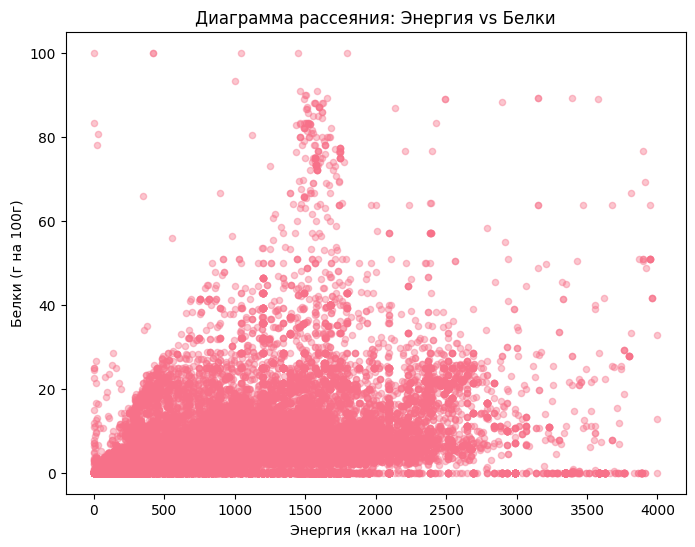

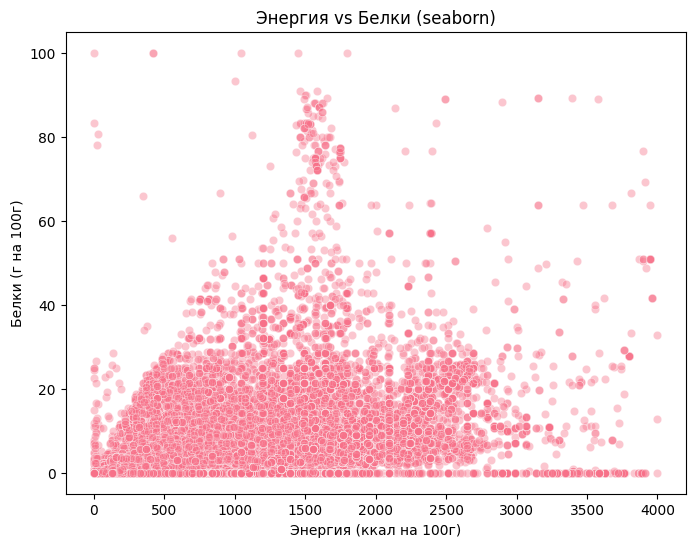

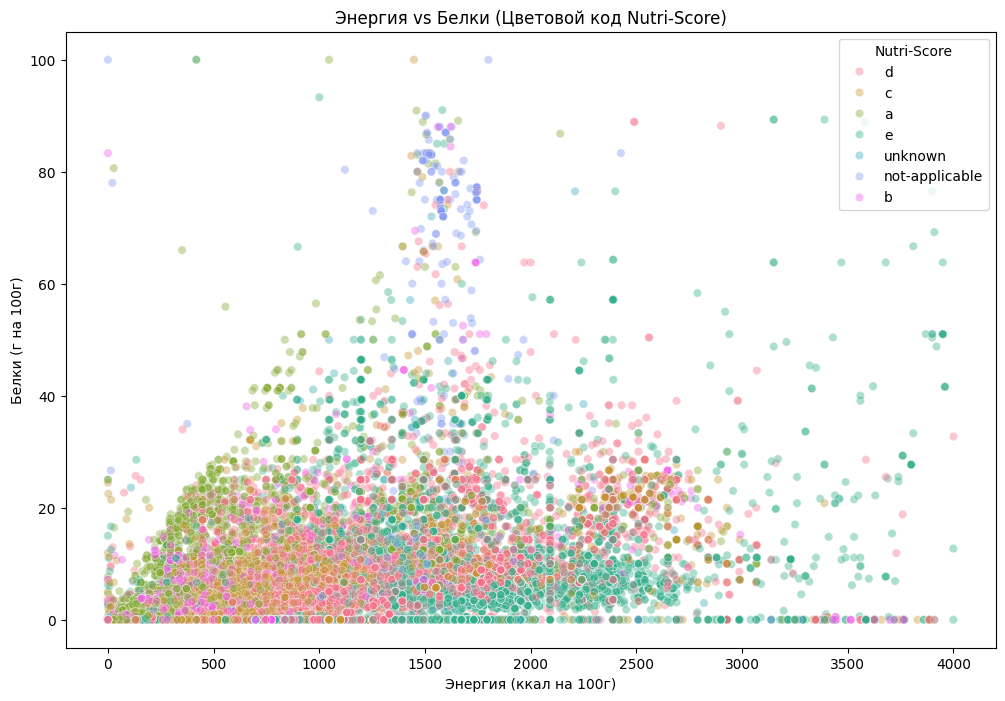

Диаграммы рассеяния построены успешно!


In [6]:
# Упражнение 3a: Диаграммы рассеяния
# TODO: Реализуйте когда датасет загружен

# CODE
# 1. Базовая диаграмма рассеивания
df.plot(kind='scatter', x='energy_100g', y='proteins_100g', alpha=0.4, figsize=(8,6) )
plt.title('Диаграмма рассеяния: Энергия vs Белки')
plt.xlabel('Энергия (ккал на 100г)')
plt.ylabel('Белки (г на 100г)')
plt.show()

# 2. Улучшенная диаграмма рассеяния с цветовым кодированием Nutri-Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='energy_100g', y='proteins_100g', alpha=0.4)
plt.title('Энергия vs Белки (seaborn)')
plt.xlabel('Энергия (ккал на 100г)')
plt.ylabel('Белки (г на 100г)')
plt.show()

# 3. Диаграмма рассеяния с цветовым кодированием Nutri-Score
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='energy_100g', y='proteins_100g', hue='nutriscore_grade', alpha=0.4, palette='husl')
plt.title('Энергия vs Белки (Цветовой код Nutri-Score)')
plt.xlabel('Энергия (ккал на 100г)')
plt.ylabel('Белки (г на 100г)')
plt.legend(title="Nutri-Score", loc='upper right')
plt.show()

print("Диаграммы рассеяния построены успешно!")

### Упражнение 3b: Коробчатые диаграммы - Распределение питательных веществ по Nutri-Score

**Цель:** Использовать коробчатые диаграммы для сравнения пищевой ценности между различными оценками Nutri-Score.

**Инструкции:**
1. Создайте коробчатые диаграммы для энергетической ценности по оценке Nutri-Score
2. Создайте коробчатые диаграммы для содержания сахара по оценке Nutri-Score
3. Попробуйте комбинированную технику коробчатая диаграмма + strip plot из лекции
4. Сравните результаты: Как различаются пищевые показатели по оценкам A-E?

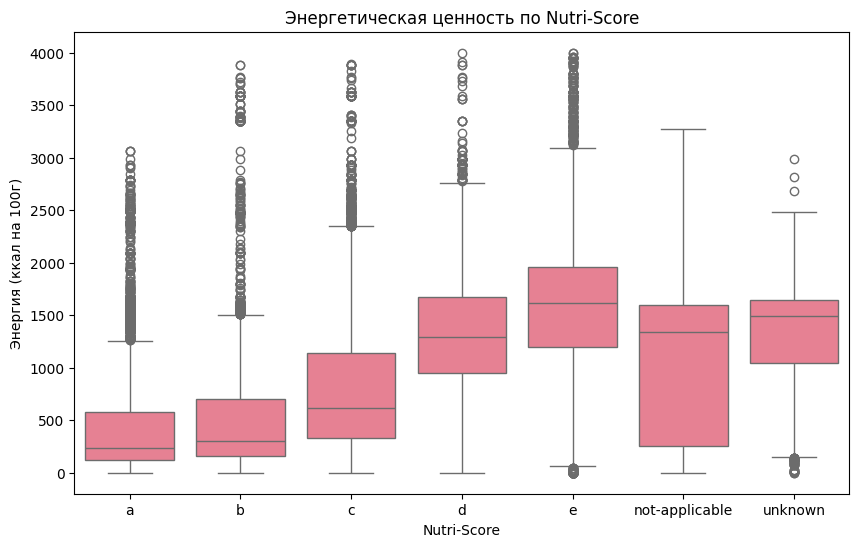

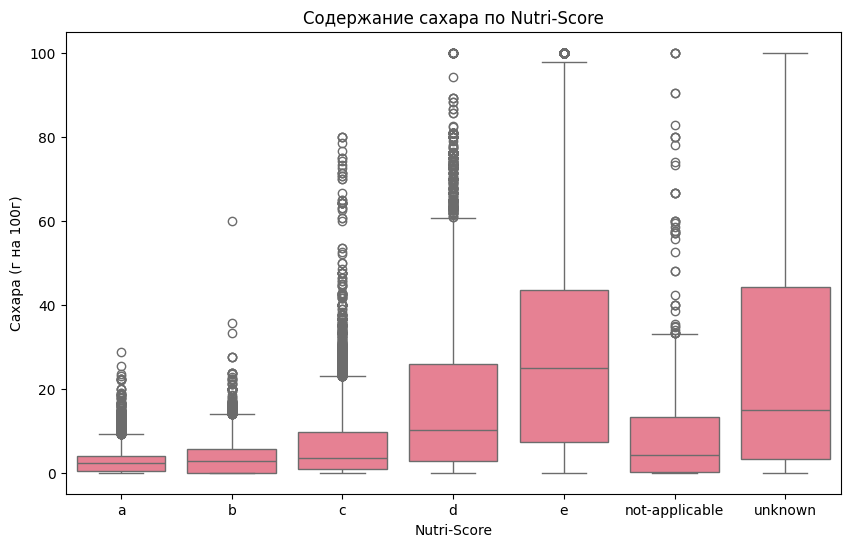

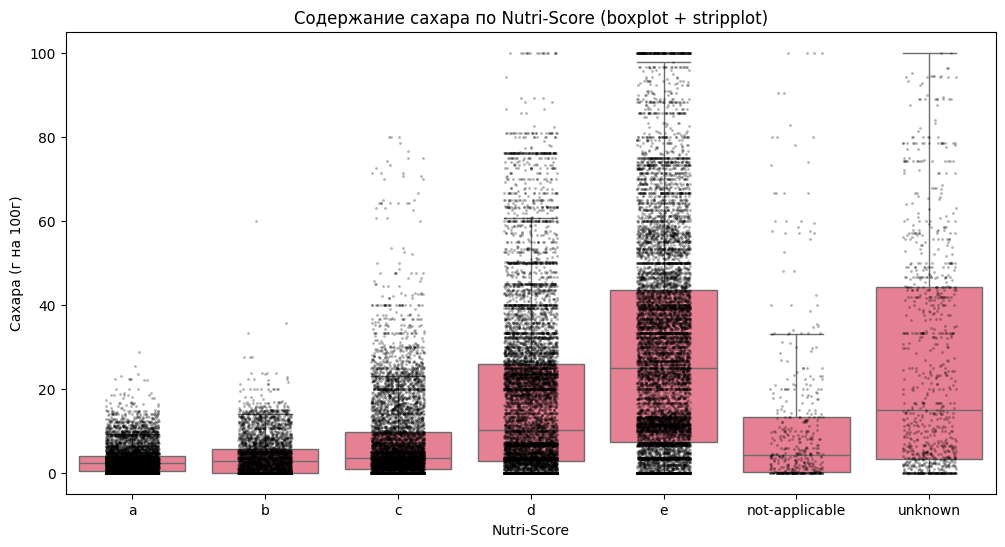

Коробчатые диаграммы построены успешно!


In [7]:
# Упражнение 3b: Коробчатые диаграммы

# 1. Коробчатая диаграмма для энергетической ценности по Nutri-Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nutriscore_grade', y='energy_100g', order=sorted(df['nutriscore_grade'].unique()))
plt.title('Энергетическая ценность по Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Энергия (ккал на 100г)')
plt.show()

# 2. Коробчатая диаграмма для содержания сахара по Nutri-Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='nutriscore_grade', y='sugars_100g', order=sorted(df['nutriscore_grade'].unique()))
plt.title('Содержание сахара по Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Сахара (г на 100г)')
plt.show()

# 3. Комбинированная техника: boxplot + stripplot для сахара
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='nutriscore_grade', y='sugars_100g', order=sorted(df['nutriscore_grade'].unique()), showfliers=False)
sns.stripplot(data=df, x='nutriscore_grade', y='sugars_100g', order=sorted(df['nutriscore_grade'].unique()), color='black', alpha=0.3, jitter=0.2, size=2)
plt.title('Содержание сахара по Nutri-Score (boxplot + stripplot)')
plt.xlabel('Nutri-Score')
plt.ylabel('Сахара (г на 100г)')
plt.show()

print("Коробчатые диаграммы построены успешно!")  

### Упражнение 3c: Скрипичные диаграммы и KDE - Анализ распределений

**Цель:** Использовать скрипичные диаграммы и KDE для анализа формы распределений питательных веществ.

**Инструкции:**
1. Создайте скрипичные диаграммы для содержания жиров по оценке Nutri-Score
2. Используйте KDE графики для сравнения распределений белка по оценкам
3. Экспериментируйте с обеими техниками и сравните их выводы
4. Определите какие продукты имеют необычные пищевые профили

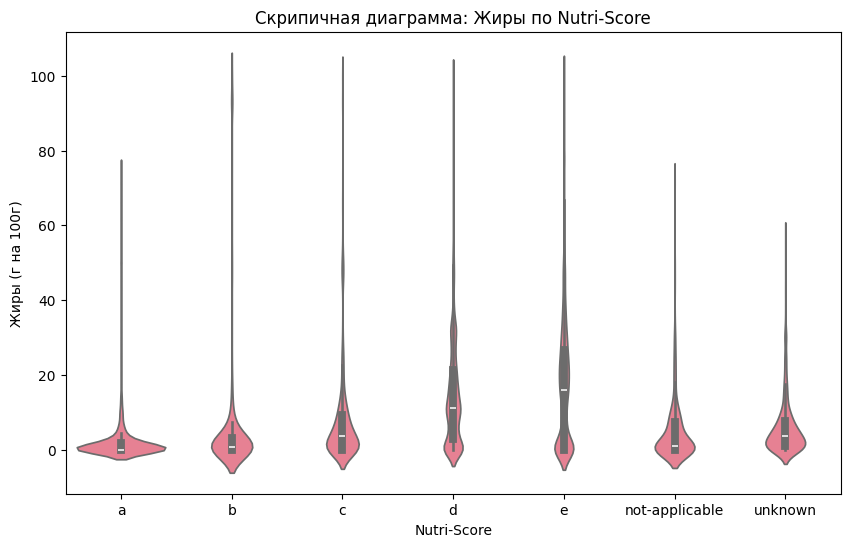

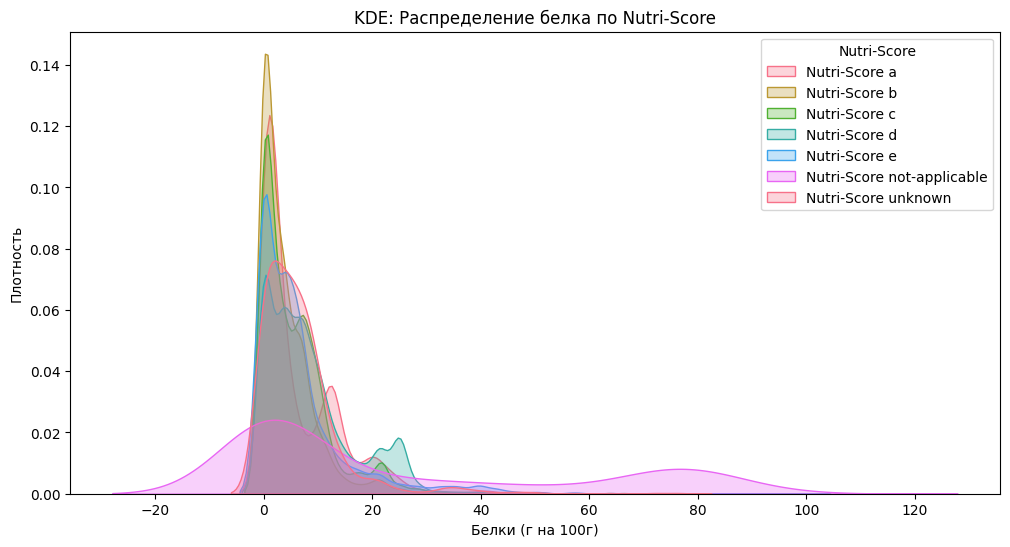

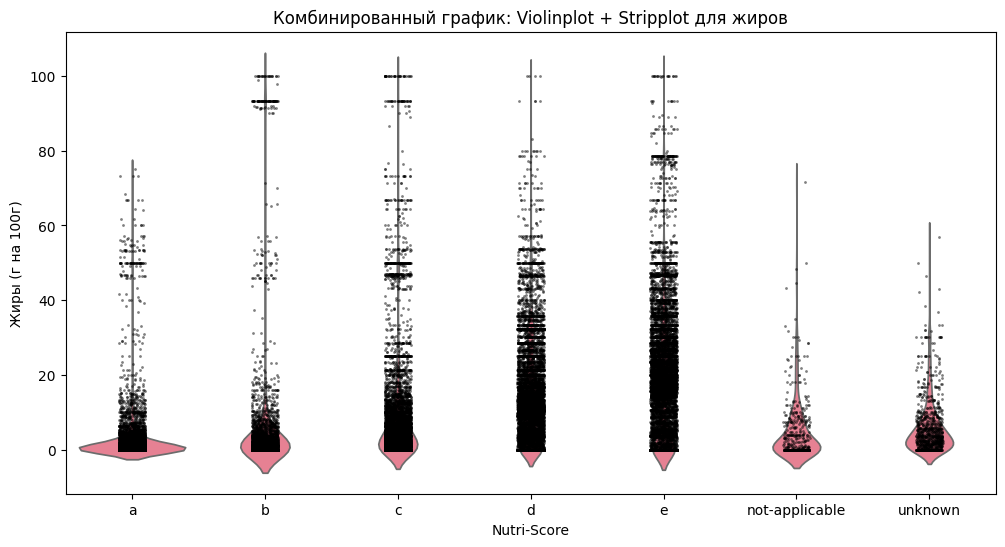

Скрипичные диаграммы и KDE графики построены успешно!


In [8]:
# Упражнение 3c: Скрипичные диаграммы и KDE

# 1. Скрипичная диаграмма для содержания жиров по Nutri-Score
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='nutriscore_grade', y='fat_100g', order=sorted(df['nutriscore_grade'].unique()))
plt.title('Скрипичная диаграмма: Жиры по Nutri-Score')
plt.xlabel('Nutri-Score')
plt.ylabel('Жиры (г на 100г)')
plt.show()

# 2. KDE графики для сравнения распределений белка по Nutri-Score
plt.figure(figsize=(12, 6))
for grade in sorted(df['nutriscore_grade'].dropna().unique()):
    subset = df[df['nutriscore_grade'] == grade]
    sns.kdeplot(subset['proteins_100g'], label=f"Nutri-Score {grade}", fill=True, alpha=0.3)
plt.title('KDE: Распределение белка по Nutri-Score')
plt.xlabel('Белки (г на 100г)')
plt.ylabel('Плотность')
plt.legend(title='Nutri-Score')
plt.show()

# Комбинированный график: violinplot + stripplot для жиров
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='nutriscore_grade', y='fat_100g', order=sorted(df['nutriscore_grade'].unique()), inner=None)
sns.stripplot(data=df, x='nutriscore_grade', y='fat_100g', order=sorted(df['nutriscore_grade'].unique()), color='k', alpha=0.5, size=2)
plt.title('Комбинированный график: Violinplot + Stripplot для жиров')
plt.xlabel('Nutri-Score')
plt.ylabel('Жиры (г на 100г)')
plt.show()

print("Скрипичные диаграммы и KDE графики построены успешно!")

## Упражнение 4: Продвинутый многомерный анализ

### Упражнение 4a: Парные графики - Взаимосвязи питательных веществ

**Цель:** Использовать парные графики для исследования взаимосвязей между всеми пищевыми переменными одновременно.

**Инструкции:**
1. Создайте парный график для основных пищевых компонентов (энергия, белок, углеводы, жиры)
2. Используйте цветовое кодирование по оценке Nutri-Score
3. Попробуйте и гистограмму, и KDE на диагонали
4. Определите наиболее сильные корреляции и наиболее разделимые питательные вещества

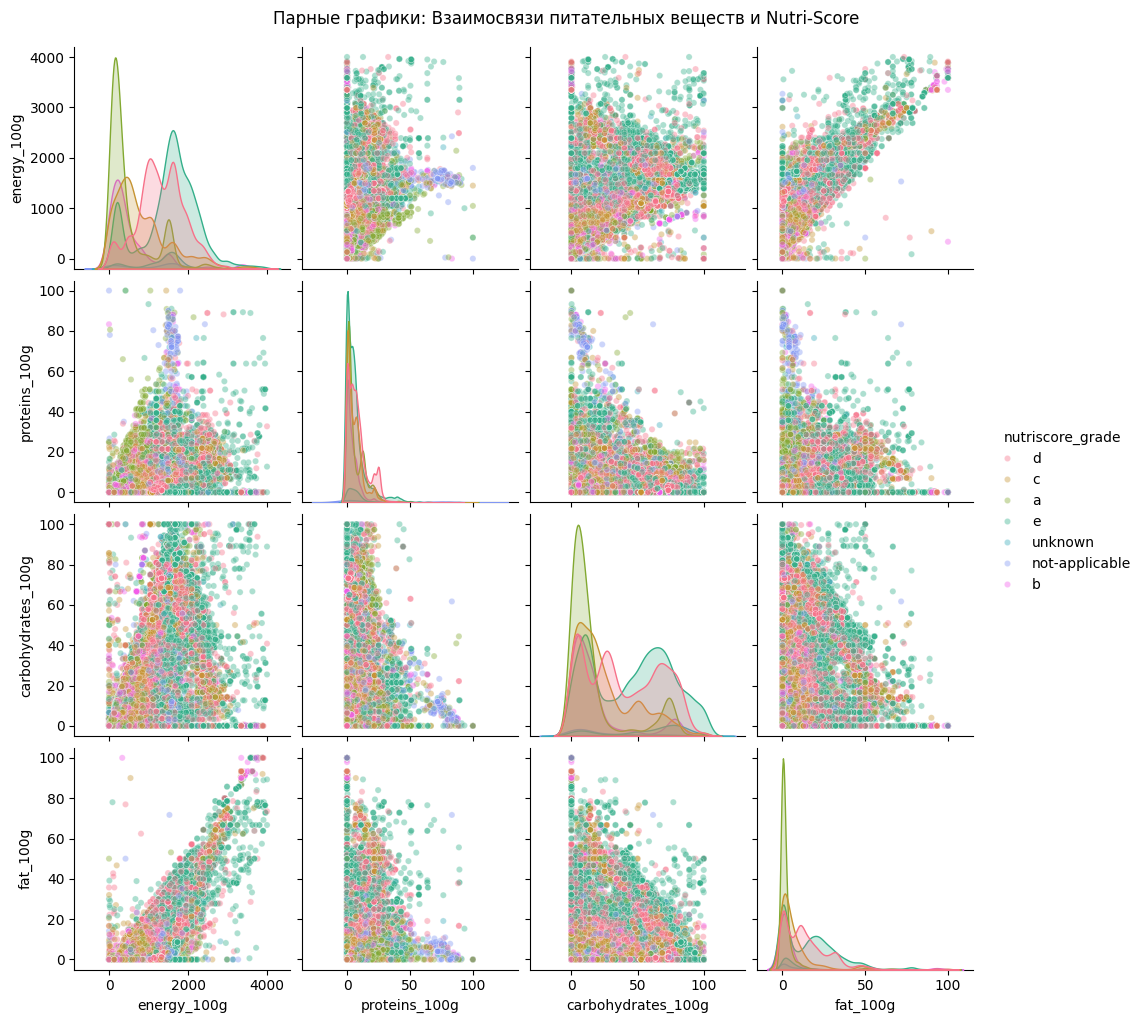

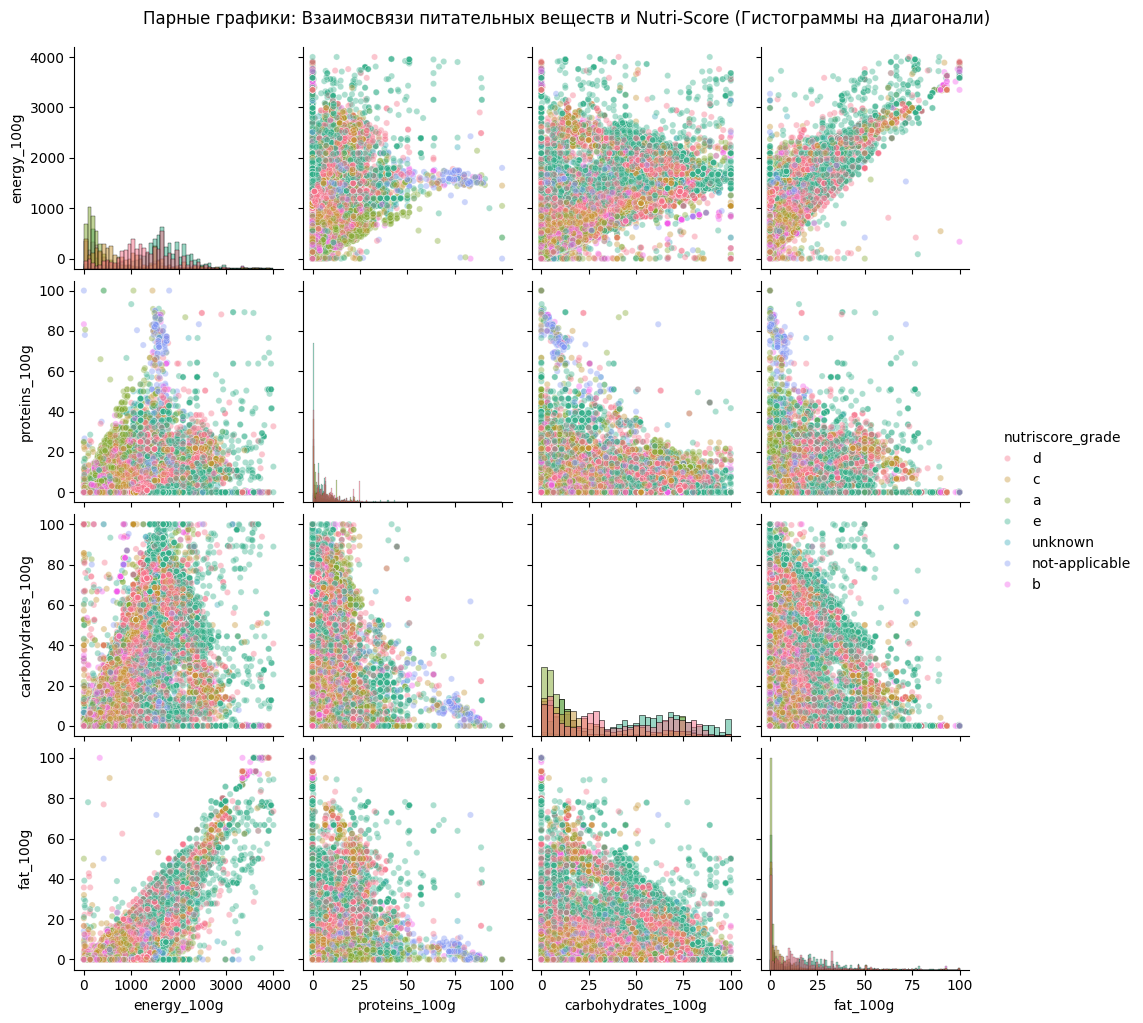

In [9]:
# Упражнение 4a: Парные графики

# Выбираем основные пищевые переменные для анализа
nutrients = ['energy_100g', 'proteins_100g', 'carbohydrates_100g', 'fat_100g']

# Строим парный график с цветовым кодированием по Nutri-Score
sns.pairplot(
    df,
    vars=nutrients,
    hue='nutriscore_grade',
    diag_kind='kde',  # Можно заменить на 'hist' для сравнения
    palette='husl',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Парные графики: Взаимосвязи питательных веществ и Nutri-Score', y=1.02)
plt.show()

# Альтернатива на hist
sns.pairplot(
    df,
    vars=nutrients,
    hue='nutriscore_grade',
    diag_kind='hist',  # Используем гистограммы на диагонали
    palette='husl',
    plot_kws={'alpha': 0.4, 's': 20}
)
plt.suptitle('Парные графики: Взаимосвязи питательных веществ и Nutri-Score (Гистограммы на диагонали)', y=1.02)
plt.show()

### Упражнение 4b: Продвинутые многомерные техники

**Цель:** Применить сложные методы визуализации из лекции: Кривые Эндрюса, Параллельные координаты и RadViz.

**Инструкции:**
1. Используйте Кривые Эндрюса для визуализации пищевых паттернов
2. Создайте график Параллельные координаты для профилей питательных веществ
3. Примените RadViz для просмотра кластеризации питательных веществ
4. Сравните выводы от каждого метода

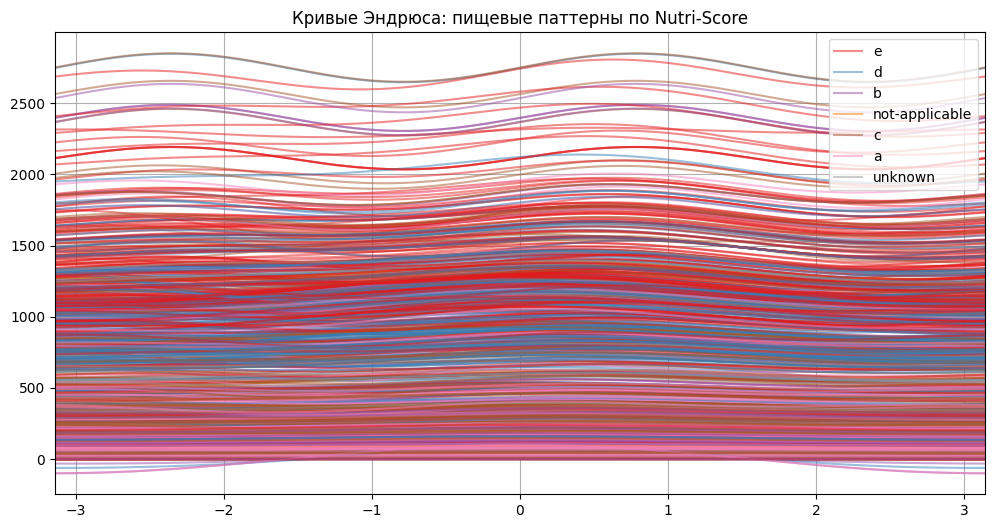

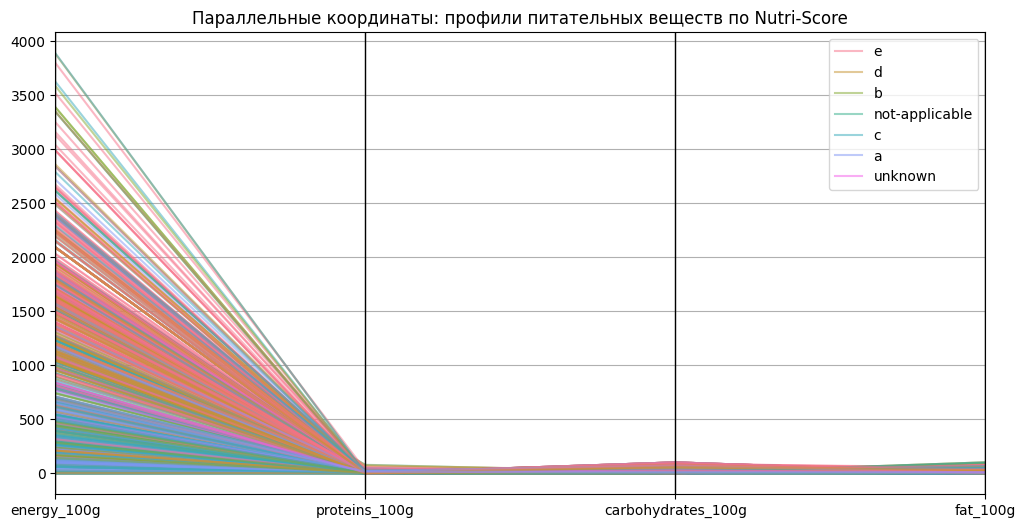

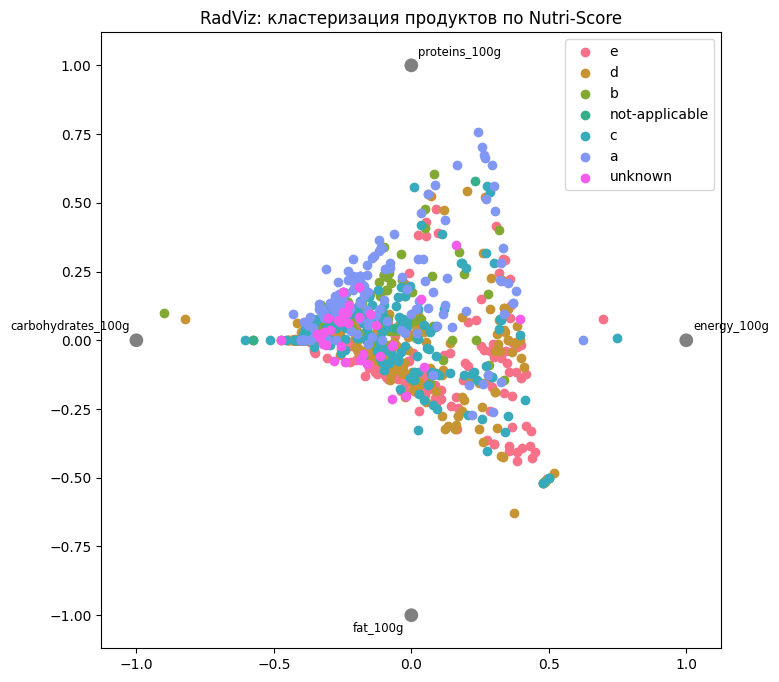

In [10]:
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Упражнение 4b: Продвинутые многомерные техники
# TODO: Реализуйте когда датасет загружен
# Подготовим подвыборку для производительности (например, 1000 строк)
df_advanced = df[["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "nutriscore_grade"]].dropna()
df_sample = df_advanced.sample(1000, random_state=42)

# 1. Кривые Эндрюса
plt.figure(figsize=(12, 6))
andrews_curves(df_sample, 'nutriscore_grade', alpha=0.5, colormap="Set1")
plt.title('Кривые Эндрюса: пищевые паттерны по Nutri-Score')
plt.show()

# 2. Параллельные координаты
plt.figure(figsize=(12, 6))
parallel_coordinates(df_sample[['nutriscore_grade'] + nutrients], 'nutriscore_grade', alpha=0.5, color=sns.color_palette('husl', df_sample['nutriscore_grade'].nunique()))
plt.title('Параллельные координаты: профили питательных веществ по Nutri-Score')
plt.show()

# 3. RadViz
plt.figure(figsize=(8, 8))
radviz(df_sample[['nutriscore_grade'] + nutrients], 'nutriscore_grade', color=sns.color_palette('husl', df_sample['nutriscore_grade'].nunique()))
plt.title('RadViz: кластеризация продуктов по Nutri-Score')
plt.show()

## Упражнения-вызовы

Готовы к более продвинутым вызовам? Эти упражнения проверят ваше понимание и креативность!

### Вызов 1: Анализ категорий
**Задача:** Проанализируйте как пищевая ценность варьируется между различными категориями продуктов.
- Извлеките и очистите столбец `categories`
- Создайте визуализации, сравнивающие основные категории продуктов
- Найдите какие категории имеют лучшие/худшие пищевые профили

### Вызов 2: Географический анализ  
**Задача:** Исследуйте пищевые различия между странами.
- Разберите столбец `countries`  
- Сравните пищевые стандарты между различными регионами
- Определите страны с самыми здоровыми пищевыми продуктами

### Вызов 3: Собственные выводы
**Задача:** Найдите свой собственный интересный паттерн в данных.
- Выберите аспект данных, который вас интересует
- Примените множественные техники визуализации
- Представьте убедительную историю о ваших находках

### Вызов 4: Интерактивная панель
**Задача:** Создайте интерактивную визуализацию (если знаете Plotly/Bokeh).
- Разрешите фильтрацию по категории, стране или Nutri-Score
- Включите масштабирование и наведение для деталей
- Сделайте это полезным для анализа пищевой промышленности

In [18]:
pip install nbformat

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


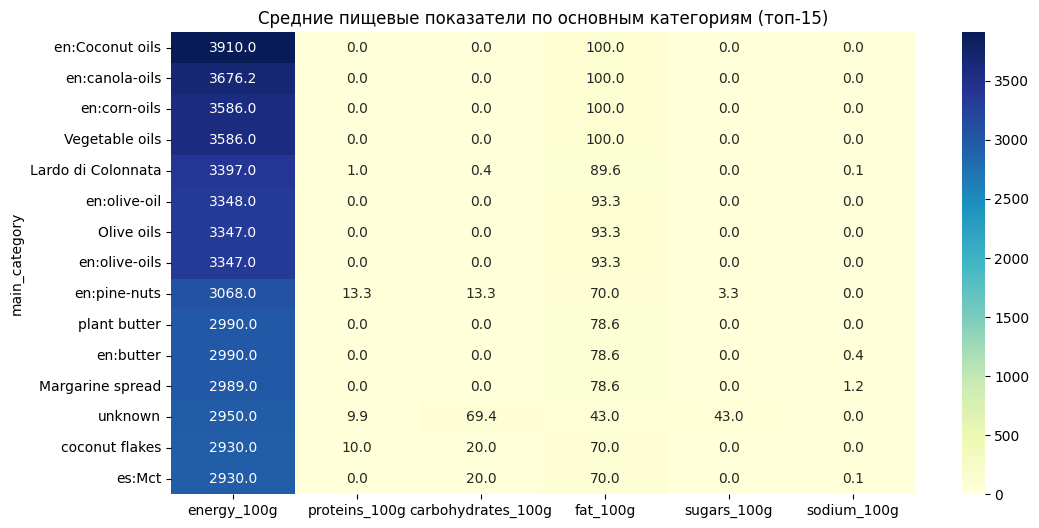

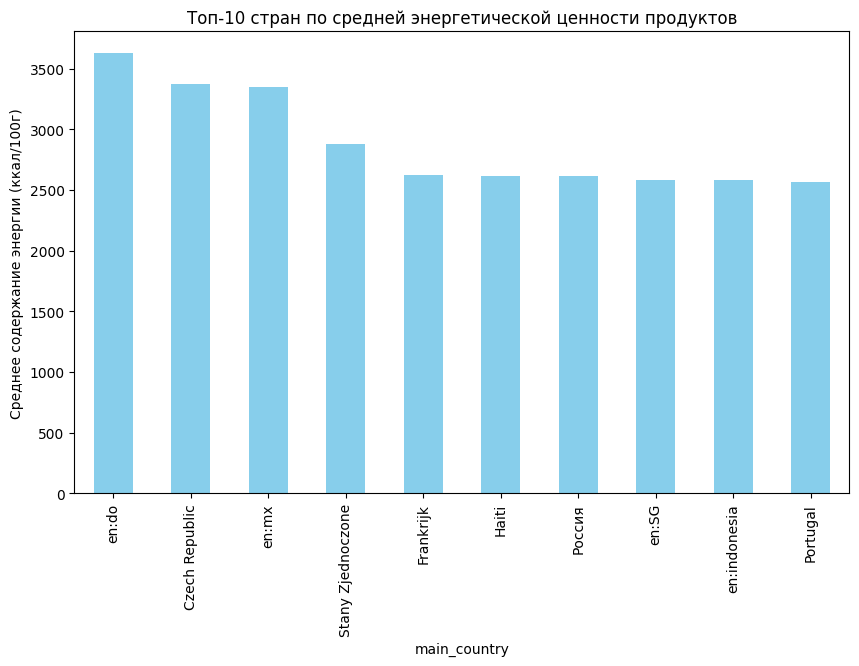

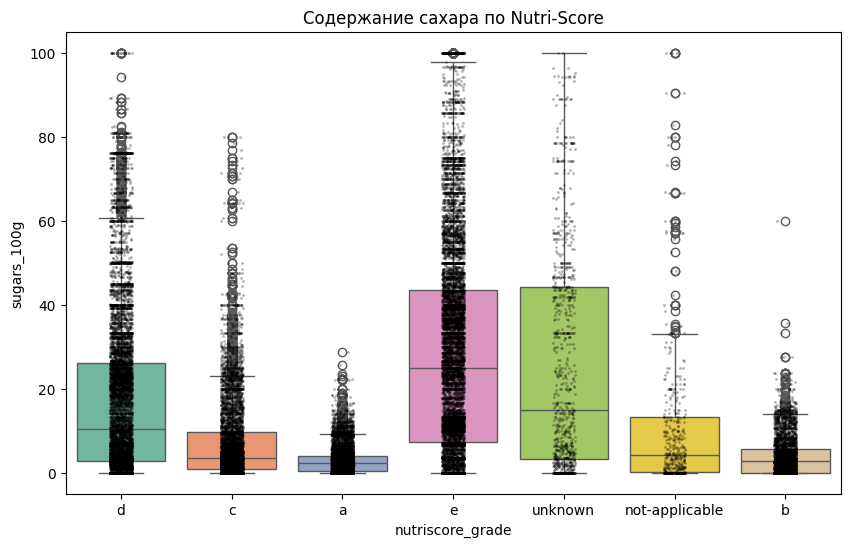

Вывод: продукты с Nutri-Score E заметно содержат больше сахара, чем A.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [20]:
import plotly.express as px 


# Вызов 1: Анализ категорий
df_cat = df.copy()
df_cat["main_category"] = df_cat["categories"].str.split(",").str[0].str.strip()
df_cat = df_cat.dropna(subset=["main_category"])
nutrition_vars = ["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g", "sugars_100g", "sodium_100g"]


category_stats = (
    df_cat.groupby("main_category")[nutrition_vars]
    .mean()
    .sort_values("energy_100g", ascending=False)
)


plt.figure(figsize=(12, 6))
sns.heatmap(category_stats.head(15), annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Средние пищевые показатели по основным категориям (топ-15)")
plt.show()


# Вызов 2: Географический анализ
df_geo = df.copy()
df_geo["main_country"] = df_geo["countries"].str.split(",").str[0].str.strip()
df_geo = df_geo.dropna(subset=["main_country"])


country_stats = (
    df_geo.groupby("main_country")[nutrition_vars]
    .mean()
    .sort_values("energy_100g", ascending=False)
)


plt.figure(figsize=(10, 6))
country_stats["energy_100g"].head(10).plot(kind="bar", color="skyblue")
plt.title("Топ-10 стран по средней энергетической ценности продуктов")
plt.ylabel("Среднее содержание энергии (ккал/100г)")
plt.show()


# Вызов 3: Собственные выводы
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="nutriscore_grade", y="sugars_100g", palette="Set2")
sns.stripplot(data=df, x="nutriscore_grade", y="sugars_100g", color="black", alpha=0.3, size=2)
plt.title("Содержание сахара по Nutri-Score")
plt.show()


print("Вывод: продукты с Nutri-Score E заметно содержат больше сахара, чем A.")


# Вызов 4: Интерактивная панель (Plotly)
# Гарантируем, что main_category и main_country есть в df
if "main_category" not in df.columns:
    df["main_category"] = df["categories"].str.split(",").str[0].str.strip()
if "main_country" not in df.columns:
    df["main_country"] = df["countries"].str.split(",").str[0].str.strip()


fig = px.scatter(
    df.sample(2000, random_state=42), 
    x="energy_100g", y="proteins_100g", 
    color="nutriscore_grade", 
    hover_data=["product_name", "main_category", "main_country"],
    title="Интерактивная диаграмма: Энергия vs Белки (цвет — Nutri-Score)",
    labels={"energy_100g": "Энергия (ккал/100г)", "proteins_100g": "Белки (г/100г)"}
    )
fig.show()

## Резюме и рефлексия

### Что вы практиковали:
**Загрузка и очистка данных** - Работа с реальными грязными данными  
**Базовая визуализация** - Диаграммы рассеяния, коробчатые диаграммы, скрипичные диаграммы  
**Продвинутые техники** - Парные графики, кривые Эндрюса, параллельные координаты, RadViz  
**Статистический анализ** - KDE, анализ распределений, обнаружение выбросов  
**Многомерный анализ** - Исследование сложных взаимосвязей  

### Ключевые выводы:
1. **Реальные данные грязные** - очистка критически важна для осмысленного анализа
2. **Множественные перспективы важны** - разные графики раскрывают разные выводы  
3. **Цветовое кодирование мощно** - категориальные переменные добавляют глубину анализу
4. **Продвинутые техники** - полезны для сложных многомерных взаимосвязей
5. **Контекст имеет значение** - доменные знания помогают интерпретировать результаты

### Следующие шаги:
- Попробуйте с различными датасетами (данные ВОЗ о здоровье, экономические показатели и т.д.)
- Изучите библиотеки интерактивной визуализации (Plotly, Bokeh)
- Исследуйте статистическое тестирование наряду с визуализацией
- Практикуйте рассказывание историй с данными для презентаций

### Ресурсы для дальнейшего изучения:
- **Документация Seaborn:** https://seaborn.pydata.org/
- **Галерея Matplotlib:** https://matplotlib.org/gallery/
- **Визуализация Pandas:** https://pandas.pydata.org/docs/user_guide/visualization.html
- **Книги по визуализации данных:** "The Grammar of Graphics", "Storytelling with Data"

## Дополнительные учебные материалы

### Если вы хотите углубить знания:

**Книги:**
- "The Grammar of Graphics" - Leland Wilkinson (теоретические основы)
- "Storytelling with Data" - Cole Nussbaumer Knaflic (практические советы)
- "Data Visualization: A Practical Introduction" - Kieran Healy

**Онлайн ресурсы:**
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - официальное руководство
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/) - примеры графиков
- [Python Graph Gallery](https://python-graph-gallery.com/) - коллекция графиков с кодом

**Видео курсы:**
- Data Visualization with Python на Coursera
- Matplotlib и Seaborn на YouTube
- "Fundamentals of Data Visualization" на edX

**Практические проекты:**
- Анализ данных Kaggle competitions
- Визуализация открытых данных правительства
- Создание дашбордов для бизнес-анализа

### Следующие темы для изучения:
1. **Интерактивная визуализация:** Plotly, Bokeh, Altair
2. **Веб-дашборды:** Streamlit, Dash
3. **Географическая визуализация:** Folium, GeoPandas
4. **Статистическая визуализация:** Корреляционный анализ, регрессия
5. **Большие данные:** Datashader для работы с миллионами точек